In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Import the data

In [2]:
census = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)

In [3]:
census

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
colNames = ("age", "workclass", "fnlwgt", "education",
"educationnum", "maritalstatus", "occupation",
"relationship", "race", "sex", "capitalgain",
"capitalloss", "hoursperweek", "nativecountry",
"incomelevel")

In [5]:
census.columns=colNames

In [6]:
census.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [7]:
census.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
incomelevel      0
dtype: int64

In [8]:
census.isnull().describe()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


In [9]:
census.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
pandas_profiling.ProfileReport(census)

In [11]:
census.duplicated().sum()

24

In [12]:
census.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

# Data Exploration

In [13]:
#code = {'incomelevel':{'<=50K':'1','>50K':'2'}}

In [14]:
census.replace({'incomelevel':{'<=50K':'1','>50K':'2'}},regex=True,inplace=True)

In [15]:
census.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


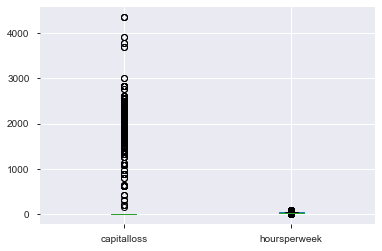

In [16]:
census.boxplot(['capitalloss','hoursperweek'])

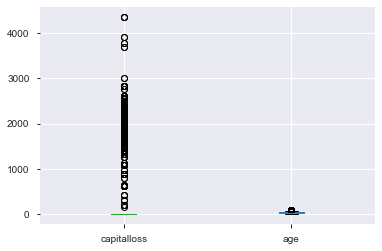

In [17]:
census.boxplot(['capitalloss','age'])

In [18]:
census['incomelevel'].apply(int)

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    2
32558    1
32559    1
32560    2
Name: incomelevel, Length: 32561, dtype: int64

In [19]:
census['incomelevel'].astype(str).apply(int)

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    2
32558    1
32559    1
32560    2
Name: incomelevel, Length: 32561, dtype: int64

In [20]:
census['incomelevel']=census['incomelevel'].astype(int)

In [21]:
census['incomelevel']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    2
32558    1
32559    1
32560    2
Name: incomelevel, Length: 32561, dtype: int32

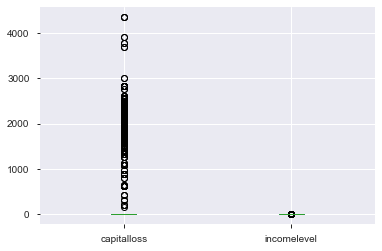

In [22]:
census.boxplot(['capitalloss','incomelevel'])

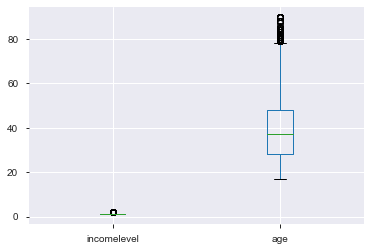

In [23]:
census.boxplot(['incomelevel','age'])

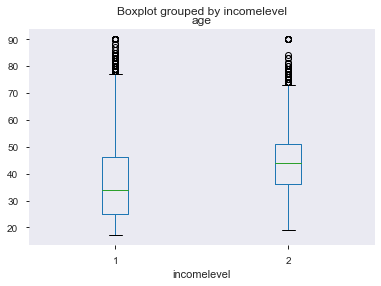

In [57]:
%matplotlib inline
census.boxplot(by ='incomelevel', column =['age'], grid = False,) 

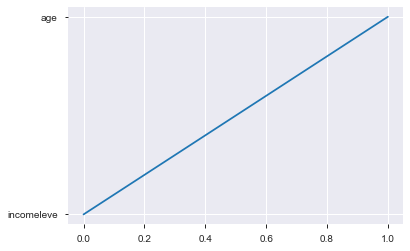

In [25]:
plt.plot(['incomeleve','age'])

In [26]:
census['incomelevel'].mean()

1.2408095574460243

In [46]:
x=census['age'].aggregate(['min','max'])
x

min    17
max    90
Name: age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D86B4BBC48>,
      dtype=object)

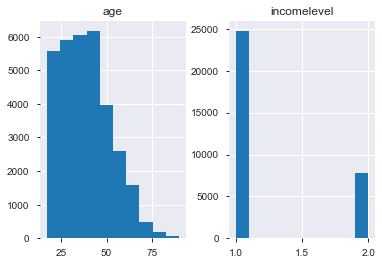

In [62]:
census.hist(column=['age','incomelevel'])

In [96]:
incomelevel_above50=census.query('incomelevel==2')

In [102]:
bins=incomelevel_above50['incomelevel']
bins

7        2
8        2
9        2
10       2
11       2
        ..
32539    2
32545    2
32554    2
32557    2
32560    2
Name: incomelevel, Length: 7841, dtype: int32

In [104]:
age = census['age']
age

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64